### Dimensionamento  
Mudar o tamanho da imagem. A função *cv2.resize()* permite isso. O tamanho da imagem pode ser especificado manualmente ou você pode especificar o fator de escala. Diferentes métodos de interpolação são usados. Os métodos de interpolação preferíveis são *cv2.INTER_AREA* para redução e *cv2.INTER_CUBIC* (lento) e *cv2.INTER_LINEAR* para zoom. Por padrão, o método de interpolação usado é cv2.INTER_LINEAR para todos os fins de redimensionamento.

Pode ser feito de duas formas. A primeira usa os próprios métodos da função

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread(r'C:\Users\Flavinho\Desktop\visao-computacional\opencv testes\messi5.jpg')
print(img.shape)

res = cv2.resize(img,None, fx=2, fy=1, interpolation = cv2.INTER_CUBIC)
print(res.shape)

(342, 548, 3)
(342, 1096, 3)


A segunda forma utiliza as medidas obtidas da função *img.shape[:2]*

In [4]:
height, width = img.shape[:2]
res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)
print(res.shape)

(684, 1096, 3)


### Translação  
É a mudança de localização da imagem. Se você conhece a mudança na direção (x,y), seja (tx,ty), você pode criar a matriz de transformação M:
![MATRIZ](matriz_translacao.webp)  
Podemos passá-lo para um array Numpy do tipo *np.float32* e passar pra função *cv2.warpAffine()*. Usaremos uma translação de (100,50), onde o primeiro é o horizontal, e o segundo o vertical.

In [6]:
img = cv2.imread(r'C:\Users\Flavinho\Desktop\visao-computacional\opencv testes\messi5.jpg', 0)
rows,cols = img.shape

M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))

cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Rotação  
OpenCV fornece rotação em escala com centro de rotação ajustável para que você possa girar em qualquer local de sua preferência. A matriz de transformação modificada é dada por:  
![MATRIZ](matriz_rotacao.webp)  
Para achar essa matriz, temos a função *cv2.getRotationMatrix2D()* com 3 argumentos  
center -> centro  
angle -> ângulo de rocação  
scale -> escala da imagem  

In [7]:
img = cv2.imread(r'C:\Users\Flavinho\Desktop\visao-computacional\opencv testes\messi5.jpg', 0)
rows,cols = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(img,M,(cols,rows))

cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Transformação afim
Na transformação afim, todas as linhas paralelas na imagem original ainda serão paralelas na imagem de saída. Para encontrar a matriz de transformação, precisamos de três pontos da imagem de entrada e suas localizações correspondentes na imagem de saída. Então *cv2.getAffineTransform()* criará uma matriz 2x3 que será passada para *cv2.warpAffine()*

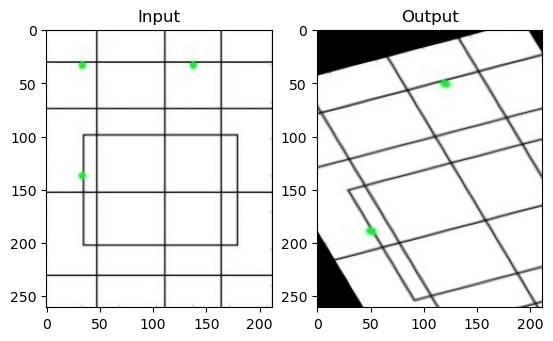

In [9]:
img = cv2.imread('desenho.jpg')
rows,cols,ch = img.shape

pts1 = np.float32([[40,40],[190,40],[40,190]])
pts2 = np.float32([[0,90],[190,40],[90,240]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

### Transformação de perspectiva
Para transformação de perspectiva, você precisa de uma matriz de transformação 3x3. As linhas retas permanecerão retas mesmo após a transformação. Para encontrar esta matriz de transformação, são necessários 4 pontos na imagem de entrada e pontos correspondentes na imagem de saída. Entre estes 4 pontos, 3 deles não devem ser colineares. Então a matriz de transformação pode ser encontrada pela função *cv2.getPerspectiveTransform()*. Em seguida, aplique *cv2.warpPerspective()* com esta matriz de transformação 3x3.

In [12]:
img = cv2.imread(r'C:\Users\Flavinho\Desktop\visao-computacional\opencv testes\operacoes avancadas\perspectiva.jpeg')
img.shape

(181, 279, 3)

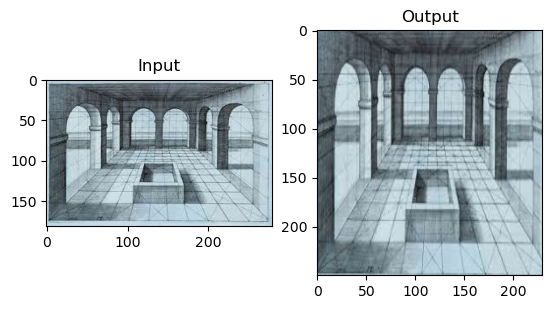

In [27]:
img = cv2.imread(r'C:\Users\Flavinho\Desktop\visao-computacional\opencv testes\operacoes avancadas\perspectiva.jpeg')
rows,cols,ch = img.shape

pts1 = np.float32([[5,10],[290,10], [5,175], [290,175]])
pts2 = np.float32([[0,0],[250,0],[0,250],[250,250]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(230,250))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()